# Read dataset

In [2]:
import pandas as pd 
from warnings import filterwarnings
filterwarnings("ignore")
A = pd.read_csv("C:/Users/Arshadali Shaikh/Downloads/AirPassengers.csv")

In [3]:
A.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Convert Date

In [6]:
A.Month = pd.to_datetime(A.Month)
A.index = A.Month                #month should be index columns so replaced with index
A = A.drop(labels=["Month"],axis=1)
A.columns = ["Passenger"]    #change the column name , do not need special character.

In [7]:
A

,Passenger
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Plot and decompose

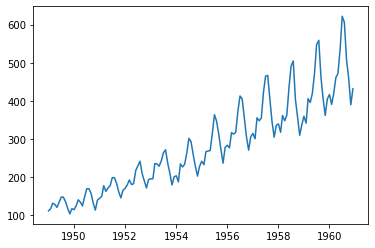

In [8]:
import matplotlib.pyplot as plt 
plt.plot(A)                   # visualize the dataset

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q = seasonal_decompose(A,model="multiplicative")

<AxesSubplot:xlabel='Month'>

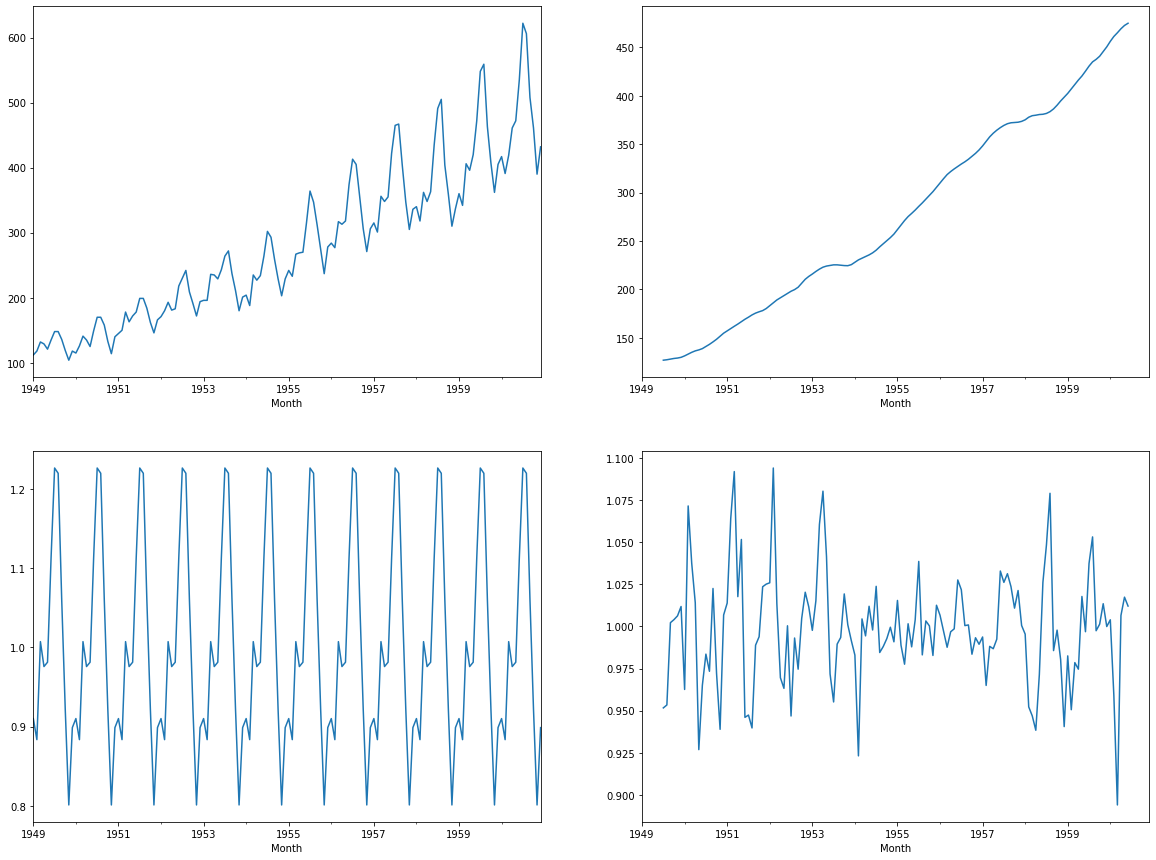

In [12]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
Q.observed.plot()

plt.subplot(2,2,2)
Q.trend.plot()

plt.subplot(2,2,3)
Q.seasonal.plot()

plt.subplot(2,2,4)
Q.resid.plot()

In [13]:
RM_or = A.rolling(window=12).mean()
RST_or = A.rolling(window=12).std()  

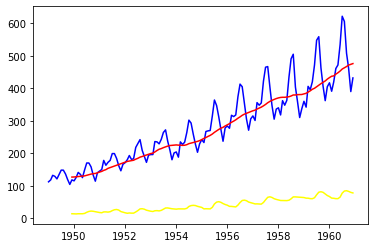

In [17]:
plt.plot(A,c="blue")
plt.plot(RM_or,c="red")
plt.plot(RST_or,c="yellow")

# Conversion attempt 1
Convert TS --> Log

In [18]:
import numpy as np
log_A = np.log(A)
RM_log_A = log_A.rolling(window=12).mean()
RST_log_A = log_A.rolling(window=12).std() #to convert dataset into stationary by using log 

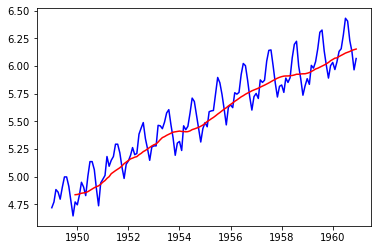

In [20]:
plt.plot(log_A,c="blue")
plt.plot(RM_log_A,c="red")


# Conversion attempt 2:
log_A - RM_logA

In [23]:
log_A = np.log(A)
RM_log_A = log_A.rolling(window=12).mean()

<AxesSubplot:xlabel='Month'>

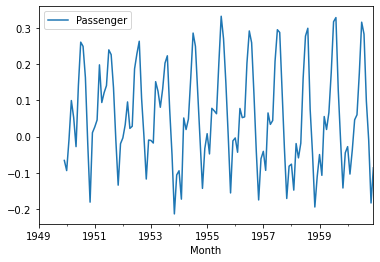

In [24]:
TS1 = log_A - RM_log_A
TS1.plot()               #by difference of log and log of rolling mean,data get converted into stationary.

# Divide data in training and testing set

In [25]:
TS_upd = TS1[TS1.Passenger.isna()==False]

In [26]:
TS_upd.shape

(133, 1)

In [28]:
trd = TS_upd[0:106]
tsd = TS_upd[106:]     #Divide the dataset into training and testing set 

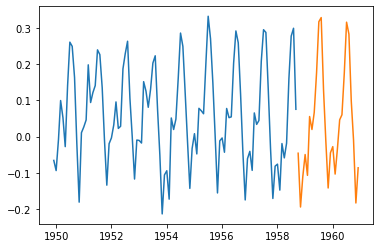

In [31]:
plt.plot(trd)
plt.plot(tsd)

# forecasting 

In [32]:
tsd

,Passenger
Month,
1958-10-01,-0.045657
1958-11-01,-0.193762
1958-12-01,-0.110499
1959-01-01,-0.049241
1959-02-01,-0.106598
1959-03-01,0.055385
1959-04-01,0.019679
1959-05-01,0.066365
1959-06-01,0.176286


In [33]:
from statsmodels.tsa.ar_model import AR
model = AR(trd).fit()

In [34]:
pred = model.predict(start="1958-10-01",end="1960-12-01")

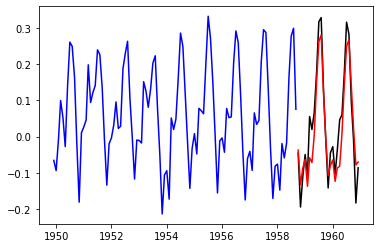

In [35]:
plt.plot(trd,c="blue")
plt.plot(tsd,c="black")
plt.plot(pred,c="red")    # predicted the model and showed by plotting.

# Convert values into its original form
Q = log(A) - RM(log(A)) log(A) = Q + RM(log(A)) A = exp(Q + RM(log(A)))

In [36]:
R = RM_log_A[RM_log_A.Passenger.isna()==False]

In [37]:
tsd.shape

(27, 1)

In [39]:
pred = pd.DataFrame(np.exp(pred + RM_log_A.tail(27).Passenger),columns=A.columns)

In [40]:
pred

,Passenger
1958-10-01,362.074874
1958-11-01,329.665472
1958-12-01,345.022132
1959-01-01,355.254891
1959-02-01,331.825018
1959-03-01,362.397462
1959-04-01,361.557750
1959-05-01,394.308061
1959-06-01,459.595119
1959-07-01,518.826980
